# from tutorial

In [1]:
import xarray as xr
from pathlib import Path

In [2]:
data_2d_z2 =  '/g/data/qx55/germany_node/d3hp003.zarr/P1D_point_z11_atm.zarr'
ds_2 = xr.open_zarr(data_2d_z2)
ds_2

<xarray.Dataset> Size: 22TB
Dimensions:       (crs: 1, time: 425, cell: 50331648, pressure: 30,
                   pressure_rva: 3)
Coordinates:
  * crs           (crs) float32 4B nan
  * pressure      (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva  (pressure_rva) int64 24B 16 18 23
  * time          (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/23)
    egpvi         (time, cell) float32 86GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    einvi         (time, cell) float32 86GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    ekhvi         (time, cell) float32 86GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    ekvvi         (time, cell) float32 86GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    hur           (time, pressure, cell) float32 3TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    hus           (time, pressure, cell) float32 3TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    ...            ...
    ua            (time, pressure, cell) float32 3TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    uas           (time, cell) float32 86GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    va            (time, pressure, cell) float32 3TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    vas           (time, cell) float32 86GB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    wa            (time, pressure, cell) float32 3TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
    zg            (time, pressure, cell) float32 3TB dask.array<chunksize=(4, 1, 262144), meta=np.ndarray>
Attributes:
    hiopy::parent:  P1D_point_z12_atm

In [3]:
pr = ds_2['pr']  # (time, cell)
pr_day = pr.isel(time=2) * 86400  # Convert from kg m-2 s-1 to mm/day

In [4]:
ds_2.pr

<xarray.DataArray 'pr' (time: 425, cell: 50331648)> Size: 86GB
dask.array<open_dataset-pr, shape=(425, 50331648), dtype=float32, chunksize=(4, 262144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  point
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       pr
    units:               kg m-2 s-1
    short_name:          
    long_name:           precipitation flux

In [5]:
ds_2.time

<xarray.DataArray 'time' (time: 425)> Size: 3kB
array(['2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', ..., '2021-02-27T00:00:00.000000000',
       '2021-02-28T00:00:00.000000000', '2021-03-01T00:00:00.000000000'],
      shape=(425,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Attributes:
    axis:     T

In [6]:
# ds_2.pr.mean("cell").values[:40]

In [7]:
# ds_2.pr.mean("cell").plot()

# at different duration

In [10]:
data_2d_z2 = '/g/data/qx55/germany_node/d3hp003.zarr/PT1H_point_z11_atm.zarr'
ds_2 = xr.open_zarr(data_2d_z2)

data_2d_z3 = '/g/data/qx55/germany_node/d3hp003.zarr/PT3H_point_z11_atm.zarr'
ds_3 = xr.open_zarr(data_2d_z3)

data_2d_z4 = '/g/data/qx55/germany_node/d3hp003.zarr/P1D_point_z11_atm.zarr'
ds_4 = xr.open_zarr(data_2d_z4)

# data_2d_z5 = '/g/data/qx55/germany_node/d3hp003.zarr/P1D_mean_z11_atm.zarr'
# ds_5 = xr.open_zarr(data_2d_z5)

In [11]:
ds_2

<xarray.Dataset> Size: 14TB
Dimensions:  (crs: 1, cell: 50331648, time: 10200)
Coordinates:
  * crs      (crs) float32 4B nan
  * time     (time) datetime64[ns] 82kB 2020-01-01T01:00:00 ... 2021-03-01
Dimensions without coordinates: cell
Data variables:
    orog     (cell) float32 201MB dask.array<chunksize=(50331648,), meta=np.ndarray>
    pr       (time, cell) float32 2TB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    psl      (time, cell) float32 2TB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    rlut     (time, cell) float32 2TB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    rsut     (time, cell) float32 2TB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    sftgif   (cell) float32 201MB dask.array<chunksize=(50331648,), meta=np.ndarray>
    sftlf    (cell) float32 201MB dask.array<chunksize=(50331648,), meta=np.ndarray>
    ts       (time, cell) float32 2TB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    uas      (time, cell) float32 2TB dask.array<chunksize=(4, 262144), meta=np.ndarray>
    vas      (time, cell) float32 2TB dask.array<chunksize=(4, 262144), meta=np.ndarray>
Attributes:
    hiopy::parent:  PT1H_point_z12_atm

In [12]:
ds_dict = {2:ds_2.pr, 3:ds_3.pr, 4:ds_4.pr}

In [13]:

import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

KeyboardInterrupt: 

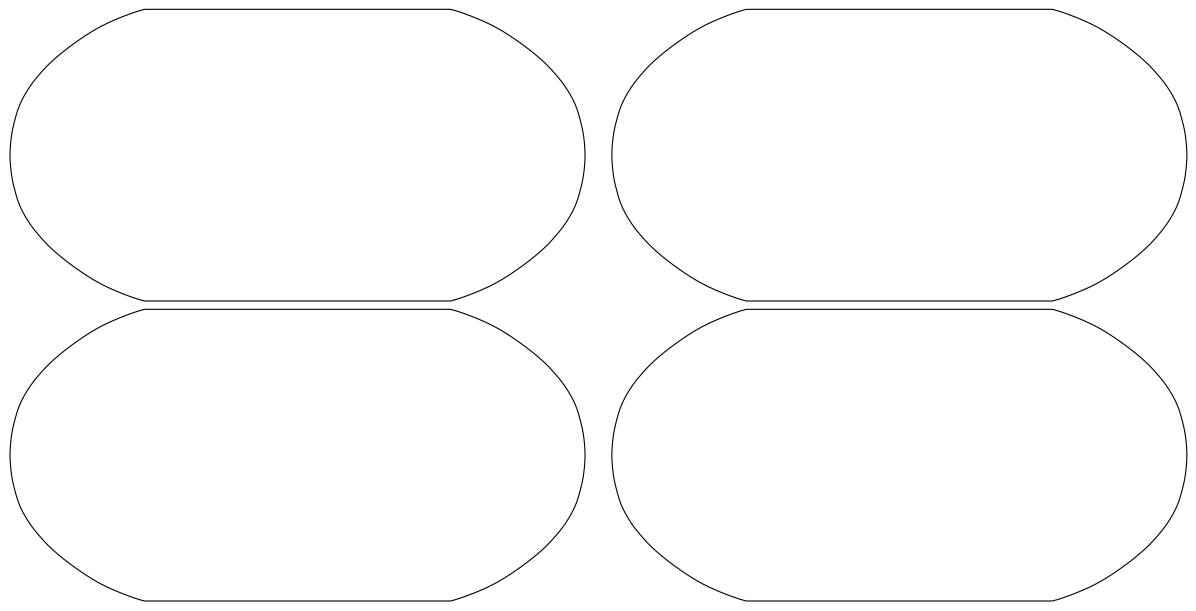

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define projection
projection = ccrs.Robinson(central_longitude=0)

# Create subplots with projection
fig, axes = plt.subplots(2, 2, figsize=(12, 6),
                         subplot_kw={'projection': projection},
                         layout='constrained')

# Loop over dictionary items and plot each
for ax, (name, da) in zip(axes.flat, ds_dict.items()):
    # Sum over time and convert from kg/m²/s to mm (multiply by 86400 seconds per day)
    data = da.sum(dim='time') * 86400  

    ax.set_global()
    im = egh.healpix_show(data.values, ax=ax, vmin=0, vmax=1000, cmap='jet')  # adjust vmax if needed
    ax.coastlines()
    ax.set_title(f'UM N2560 RAL3 total precip = {name}')
    
    # Set zoomed extent (optional)
    ax.set_extent([110, 160, -45, -5], crs=ccrs.PlateCarree())

    # Add colorbar for each subplot
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7, pad=0.05)
    cbar.set_label("Total Precipitation (mm)")

plt.show()


# extract data for 1 pixel

In [39]:
import healpy as hp
import numpy as np

# Example coordinates (change as needed)
lat = -20.0
lon = 130.0

# Get nside from the data (assuming it's stored in the attribute)
nside = da.attrs['nside']  # or manually set it, e.g., nside = 256

# Convert lat/lon to theta/phi in radians
theta = np.radians(90.0 - lat)  # colatitude
phi = np.radians(lon)           # longitude

# Get pixel index
pixel_index = hp.ang2pix(nside, theta, phi, nest=True)  # use nest=False if your data is ring-ordered


KeyError: 'nside'

In [38]:
time_series_dict = {}

for name, da in ds_dict.items():
    nside = da.attrs['nside']
    pixel_index = hp.ang2pix(nside, np.radians(90 - lat), np.radians(lon), nest=True)
    ts = da.sel(pixel=pixel_index) * 86400  # mm/day conversion
    time_series_dict[name] = ts


KeyError: 'nside'

In [ ]:
# Plotting lat/lon values over the grid
projection=ccrs.PlateCarree(central_longitude=0.0)

ax = egh.create_geoaxis(add_coastlines=True,projection=projection)
im = egh.healpix_show(data.values, ax=ax, vmin=0, vmax=10)
ax.set_title(f'UM N2560 RAL3 healpix')
ax.gridlines(draw_labels=True)
fig=ax.get_figure()
fig.colorbar(im,orientation='horizontal')